In [57]:
from numpy import frompyfunc, linspace, sqrt, exp, log, pi, zeros, arange
from mpmath import polylog
from scipy.integrate import quad
from pylab import cm
from matplotlib.ticker import AutoMinorLocator

# Specific treatment for polylogarithm function
plog = frompyfunc(polylog, 2, 1)

# Call plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'Set1' colormap
colors = mpl.colormaps['tab10'](2)

infty = 100
T = 300 #Temperature in K
kB = 0.00008617 #Bolztman constant in eV/K
kBT = kB*T
f = 10 #Conduction 17.40867685
Deltac = 0.01 #Conduction -0.08040215
a = 17 #mexican 17
b = 5000 #5000
#a = 7.2
#b = 690
d = 0.03 #Mexican 0.03
db = d/kBT
Dc = Deltac/kBT
E0 = (a**2)/(4*b*kBT) + db

In [58]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys

#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='solid',color='gray',alpha=0.5)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  subplot.set_xlabel('k')
  subplot.set_ylabel('energy (eV)')
  if 'legend' in kwargs:
    subplot.legend()
  return bands

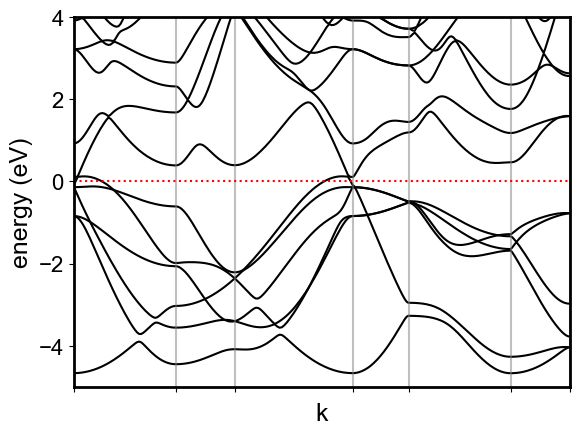

In [59]:
datafile='Mg3Bi2.bands.gnu'
fermi = 7.3
#fermi = 7.5
symmetryfile='Mg3Bi2.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',range=[-5,4])

kc = band[30][:,0]
Ekc = band[30][:,1]
kv = band[29][:,0]
Ekv = band[29][:,1]

kvv = np.append(kv[100:150]-1.574,kv[0:50])
Ekvv = np.append(Ekv[100:150],Ekv[0:50])
kcc = np.append(kc[100:150]-1.574,kc[0:50])
Ekcc = np.append(Ekc[100:150],Ekc[0:50])

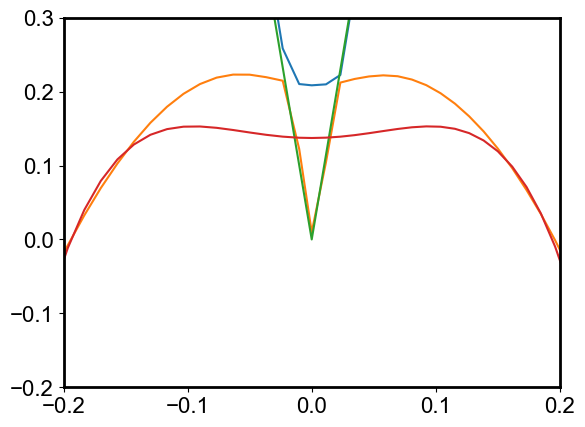

In [60]:
plt.plot(kcc,Ekcc-7.2)
plt.plot(kvv,Ekvv-7.2)
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.3])
#plt.axvline(x=0)

v = 9.95
v1 = 8.00 
v2 = 11.90
fc = v*np.abs(kcc)
fc1 = v1*np.abs(kcc)
fc2 = v2*np.abs(kcc)
plt.plot(kcc,fc)

a = 5.5
b = 490
#a = 17
#b = 5000

mm  = 0.145
mm1 = 0.100
mm2 = 0.190
a = 1/(2*mm)
a1 = 1/(2*mm1)
a2 = 1/(2*mm2)
ee1 = 0.61*kBT
fv = -(kcc**2/(4*mm)-ee1)**2/ee1
fv1 = -(kcc**2/(4*mm1)-ee1)**2/ee1 
fv2 = -(kcc**2/(4*mm2)-ee1)**2/ee1 
#fv = a*kcc**2 - b*kcc**4
plt.plot(kcc,fv+0.153)
#plt.plot(kcc,fv+0.135)
#plt.figure()
#plt.plot(kcc,Ekcc-fc-7.4)
#plt.ylim([-0.2,0.2])
#plt.xlim([-0.3,0.3])

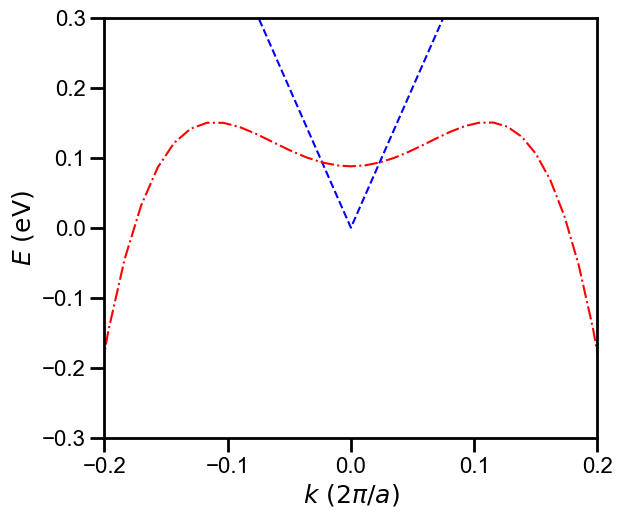

In [61]:
e1 = ee1/kBT
e1 = 0.61
mm = 0.145
a = 1/(2*mm)
e0 = 0.135/kBT+e1
vv = 4
m = 1/(6*a) 
Ee0 = e0*kBT
Ee1 = 4*e1*kBT

plt.figure(figsize=(14,12))

ax3 = plt.subplot(2,2,3)
plt.plot(kcc,vv*np.abs(kcc),'b--')
plt.plot(kcc,kcc**2/(2*m) - kcc**4/(16*m**2*Ee1)+Ee0-Ee1,'r-.')
plt.xlim([-0.2,0.2])
plt.ylim([-0.3,0.3])
plt.ylabel('$E~(\mathrm{eV})$')
plt.xlabel('$k~(2\pi/a)$')
#plt.text(-0.27,0.3,'(c)')
ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
ax3.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
ax3.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

In [62]:
## Using CRTA
alpha  = v**2/(4*a)/(kBT)
alpha1 = v1**2/(4*a1)/(kBT)
alpha2 = v2**2/(4*a2)/(kBT)
alpha3 = v**2/(4*a1)/(kBT)
alpha4 = v**2/(4*a2)/(kBT) 
alpha5 = v1**2/(4*a)/(kBT) 
alpha6 = v1**2/(4*a2)/(kBT)
alpha7 = v2**2/(4*a)/(kBT) 
alpha8 = v2**2/(4*a1)/(kBT)

def L0c(xx,E0,E1,alpha_var):
    def integrand1(x,xx):
        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)
    I1, error = quad(integrand1, -xx, infty, args=(xx))
    return (I1)/(4*sqrt(2*alpha_var))

def L1c(xx,E0,E1,alpha_var):
    def integrand1(x,xx):
        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)*x
    I1, error = quad(integrand1, -xx, infty, args=(xx))
    return (I1)/(4*sqrt(2*alpha_var))

def L2c(xx,E0,E1,alpha_var):
    def integrand1(x,xx):
        return  (x+xx)**2*(exp(x) / (exp(x)+1)**2)*(x**2)
    I1, error = quad(integrand1, -xx, infty, args=(xx))
    return (I1)/(4*sqrt(2*alpha_var))

def L0vout(xx,E0,E1):
    def integrand1(x,xx):
        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return (I1)

def L1vout(xx,E0,E1):
    def integrand1(x,xx):
        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*x*(exp(x) / (exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return (I1)

def L2vout(xx,E0,E1):
    def integrand1(x,xx):
        return  E1*sqrt(E0-x-xx)*(1+sqrt((E0-x-xx)/E1))**(3/2)*x**2*(exp(x) / (exp(x)+1)**2)
    I1, error = quad(integrand1, -infty, E0-xx, args=(xx))
    return (I1)

def L0vin(xx,E0,E1):
    def integrand3(x,xx):
        return E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
    return (I3)

def L1vin(xx,E0,E1):
    def integrand3(x,xx):
        return x*E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
    return (I3)

def L2vin(xx,E0,E1):
    def integrand3(x,xx):
        return x**2*E1*sqrt(E0-x-xx)*(1-sqrt((E0-x-xx)/E1))**(3/2)*(exp(x) / (exp(x)+1)**2)
    I3,error = quad(integrand3, E0-E1-xx, E0-xx, args=(xx))
    return (I3)

def S_c(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha)/L0c(x[i],W1,W2,alpha)
    return sc

def S_c1(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha1)/L0c(x[i],W1,W2,alpha1)
    return sc

def S_c2(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha2)/L0c(x[i],W1,W2,alpha2)
    return sc

def S_c3(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha3)/L0c(x[i],W1,W2,alpha3)
    return sc

def S_c4(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha4)/L0c(x[i],W1,W2,alpha4)
    return sc

def S_c5(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha5)/L0c(x[i],W1,W2,alpha5)
    return sc

def S_c6(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha6)/L0c(x[i],W1,W2,alpha6)
    return sc

def S_c7(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha7)/L0c(x[i],W1,W2,alpha7)
    return sc

def S_c8(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -L1c(x[i],W1,W2,alpha8)/L0c(x[i],W1,W2,alpha8)
    return sc

def sigma_c(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha)
    return sgm

def sigma_c1(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha1)
    return sgm

def sigma_c2(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha2)
    return sgm

def sigma_c3(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha3)
    return sgm

def sigma_c4(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha4)
    return sgm

def sigma_c5(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha5)
    return sgm

def sigma_c6(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha6)
    return sgm

def sigma_c7(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha7)
    return sgm

def sigma_c8(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0c(x[i],W1,W2,alpha8)
    return sgm

def kappa_c(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha)-(L1c(x[i],W1,W2,alpha)**2/L0c(x[i],W1,W2,alpha)))
    return kpp

def kappa_c1(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha1)-(L1c(x[i],W1,W2,alpha1)**2/L0c(x[i],W1,W2,alpha1)))
    return kpp

def kappa_c2(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha2)-(L1c(x[i],W1,W2,alpha2)**2/L0c(x[i],W1,W2,alpha2)))
    return kpp

def kappa_c3(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha3)-(L1c(x[i],W1,W2,alpha3)**2/L0c(x[i],W1,W2,alpha3)))
    return kpp

def kappa_c4(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha4)-(L1c(x[i],W1,W2,alpha4)**2/L0c(x[i],W1,W2,alpha4)))
    return kpp

def kappa_c5(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha5)-(L1c(x[i],W1,W2,alpha5)**2/L0c(x[i],W1,W2,alpha5)))
    return kpp

def kappa_c6(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha6)-(L1c(x[i],W1,W2,alpha6)**2/L0c(x[i],W1,W2,alpha6)))
    return kpp

def kappa_c7(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha7)-(L1c(x[i],W1,W2,alpha7)**2/L0c(x[i],W1,W2,alpha7)))
    return kpp

def kappa_c8(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = (L2c(x[i],W1,W2,alpha8)-(L1c(x[i],W1,W2,alpha8)**2/L0c(x[i],W1,W2,alpha8)))
    return kpp

def S_v(x,W1,W2):
    sc = zeros(x.size)
    for i in range(x.size):
        sc[i] = -(L1vin(x[i],W1,W2)+L1vout(x[i],W1,W2))/(L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2))
    return sc

def sigma_v(x,W1,W2):
    sgm = zeros(x.size)
    for i in range(x.size):
        sgm[i] = L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2)
    return sgm

def kappa_v(x,W1,W2):
    kpp = zeros(x.size)
    for i in range(x.size):
        kpp[i] = L2vin(x[i],W1,W2)+L2vout(x[i],W1,W2)-((L1vin(x[i],W1,W2)+L1vout(x[i],W1,W2))
                **2/(L0vin(x[i],W1,W2)+L0vout(x[i],W1,W2)))
    return kpp

def sigma(x,W1,W2):
    return sigma_c(x,W1,W2)+sigma_v(x,W1,W2)

def sigma1(x,W1,W2):
    return sigma_c1(x,W1,W2)+sigma_v(x,W1,W2)

def sigma2(x,W1,W2):
    return sigma_c2(x,W1,W2)+sigma_v(x,W1,W2)

def sigma3(x,W1,W2):
    return sigma_c3(x,W1,W2)+sigma_v(x,W1,W2)

def sigma4(x,W1,W2):
    return sigma_c4(x,W1,W2)+sigma_v(x,W1,W2)

def sigma5(x,W1,W2):
    return sigma_c5(x,W1,W2)+sigma_v(x,W1,W2)

def sigma6(x,W1,W2):
    return sigma_c6(x,W1,W2)+sigma_v(x,W1,W2)

def sigma7(x,W1,W2):
    return sigma_c7(x,W1,W2)+sigma_v(x,W1,W2)

def sigma8(x,W1,W2):
    return sigma_c8(x,W1,W2)+sigma_v(x,W1,W2)

def S(x,W1,W2):
    return (sigma_c(x,W1,W2)*S_c(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma(x,W1,W2)

def S1(x,W1,W2):
    return (sigma_c1(x,W1,W2)*S_c1(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma1(x,W1,W2)

def S2(x,W1,W2):
    return (sigma_c2(x,W1,W2)*S_c2(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma2(x,W1,W2)

def S3(x,W1,W2):
    return (sigma_c3(x,W1,W2)*S_c3(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma3(x,W1,W2)

def S4(x,W1,W2):
    return (sigma_c4(x,W1,W2)*S_c4(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma4(x,W1,W2)

def S5(x,W1,W2):
    return (sigma_c5(x,W1,W2)*S_c5(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma5(x,W1,W2)

def S6(x,W1,W2):
    return (sigma_c6(x,W1,W2)*S_c6(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma6(x,W1,W2)

def S7(x,W1,W2):
    return (sigma_c7(x,W1,W2)*S_c7(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma7(x,W1,W2)

def S8(x,W1,W2):
    return (sigma_c8(x,W1,W2)*S_c8(x,W1,W2)+sigma_v(x,W1,W2)*S_v(x,W1,W2))/sigma8(x,W1,W2)

def kappa(x,W1,W2):
    return kappa_c(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c(x,W1,W2)*sigma_v(x,W1,W2)*(S_c(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma(x,W1,W2)

def kappa1(x,W1,W2):
    return kappa_c1(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c1(x,W1,W2)*sigma_v(x,W1,W2)*(S_c1(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma1(x,W1,W2)

def kappa2(x,W1,W2):
    return kappa_c2(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c2(x,W1,W2)*sigma_v(x,W1,W2)*(S_c2(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma2(x,W1,W2)

def kappa3(x,W1,W2):
    return kappa_c3(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c3(x,W1,W2)*sigma_v(x,W1,W2)*(S_c3(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma3(x,W1,W2)

def kappa4(x,W1,W2):
    return kappa_c4(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c4(x,W1,W2)*sigma_v(x,W1,W2)*(S_c4(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma4(x,W1,W2)

def kappa5(x,W1,W2):
    return kappa_c5(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c5(x,W1,W2)*sigma_v(x,W1,W2)*(S_c5(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma5(x,W1,W2)

def kappa6(x,W1,W2):
    return kappa_c6(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c6(x,W1,W2)*sigma_v(x,W1,W2)*(S_c6(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma6(x,W1,W2)

def kappa7(x,W1,W2):
    return kappa_c7(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c7(x,W1,W2)*sigma_v(x,W1,W2)*(S_c7(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma7(x,W1,W2)

def kappa8(x,W1,W2):
    return kappa_c8(x,W1,W2)+kappa_v(x,W1,W2)+(sigma_c8(x,W1,W2)*sigma_v(x,W1,W2)*(S_c8(x,W1,W2)
            -S_v(x,W1,W2))**2)/sigma8(x,W1,W2)

def PF(Sc,Sgm):
    return (Sc**2)*Sgm

def ZT(x,W1,W2):
    return (S(x,W1,W2)**2 * sigma(x,W1,W2))/(kappa(x,W1,W2))

def ZT1(x,W1,W2):
    return (S1(x,W1,W2)**2 * sigma1(x,W1,W2))/(kappa1(x,W1,W2))

def ZT2(x,W1,W2):
    return (S2(x,W1,W2)**2 * sigma2(x,W1,W2))/(kappa2(x,W1,W2))

def ZT3(x,W1,W2):
    return (S3(x,W1,W2)**2 * sigma3(x,W1,W2))/(kappa3(x,W1,W2))

def ZT4(x,W1,W2):
    return (S4(x,W1,W2)**2 * sigma4(x,W1,W2))/(kappa4(x,W1,W2))

def ZT5(x,W1,W2):
    return (S5(x,W1,W2)**2 * sigma5(x,W1,W2))/(kappa5(x,W1,W2))

def ZT6(x,W1,W2):
    return (S6(x,W1,W2)**2 * sigma6(x,W1,W2))/(kappa6(x,W1,W2))

def ZT7(x,W1,W2):
    return (S7(x,W1,W2)**2 * sigma7(x,W1,W2))/(kappa7(x,W1,W2))

def ZT8(x,W1,W2):
    return (S8(x,W1,W2)**2 * sigma8(x,W1,W2))/(kappa8(x,W1,W2))

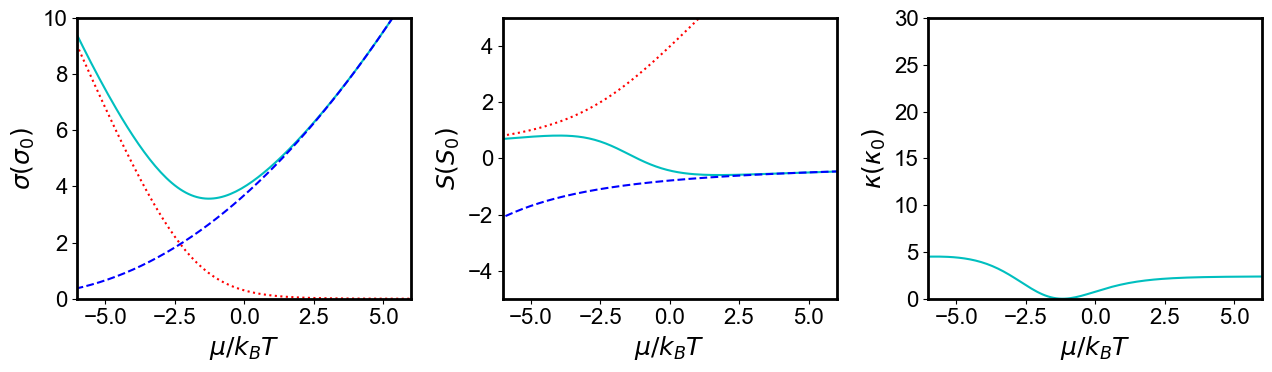

In [63]:
plt.rc('font',size=16)
plt.rc('legend',fontsize=18)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('axes',labelsize=18)

npoint = 201
eta = linspace(-10, 10, npoint)  

kT = 0.026
alpha = 10
e1 = 0.0188/kT
e0 = 0.135/kT+e1
eshift = e0 + 2

plt.figure(figsize=(13,4))

plt.subplot(131)
plt.plot(eta,sigma(eta+eshift,e0,e1),'c-')
plt.plot(eta,sigma_c(eta+eshift,e0,e1),'b--')
plt.plot(eta,sigma_v(eta+eshift,e0,e1),'r:')
plt.xlim([-6,6])
plt.ylim([0,10])
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\sigma (\sigma_0)$')

plt.subplot(132)
plt.plot(eta,S(eta+eshift,e0,e1),'c-')
plt.plot(eta,S_c(eta+eshift,e0,e1),'b--')
plt.plot(eta,S_v(eta+eshift,e0,e1),'r:')
plt.xlim([-6,6])
plt.ylim([-5,5])
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$S (S_0)$')

plt.subplot(133)
plt.plot(eta,S(eta+eshift,e0,e1)**2*sigma(eta+eshift,e0,e1),'c-')
plt.xlim([-6,6])
plt.ylim([0,30])
plt.xlabel('$\mu/k_B T$')
plt.ylabel('$\kappa (\kappa_0)$')
plt.tight_layout()

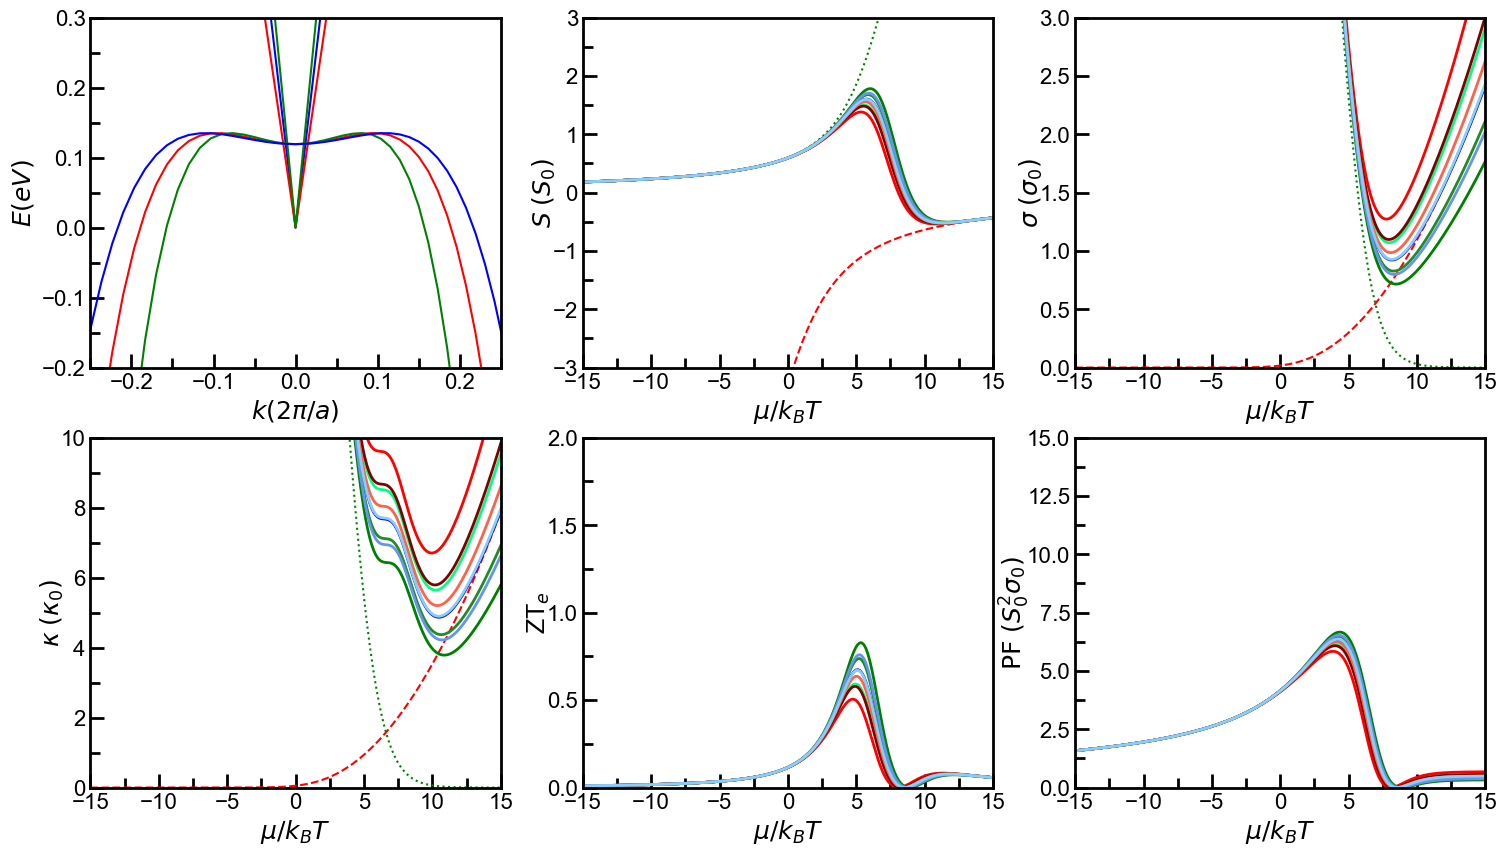

In [64]:
# Define the size of the entire plot
plt.figure(figsize=(18,10))

npoint = 201
eta = linspace(-15, 15, npoint)  

kT = 0.026
alpha = v**2/(4*a)/(kBT)
#e1 = a**2/(4*b)/(kBT)
e1 = -(min(Ekcc) - max(Ekvv))/(kBT)
e0 = 0.135/kBT+e1
eshift = 0

#eta = eta + eshift

# Subplot (a) : Dispersion relation
ax1 = plt.subplot(2,3,1)
plt.plot(kcc,fc, linestyle='solid', c='blue')
plt.plot(kcc,fc1, linestyle='solid', c='red')
plt.plot(kcc,fc2, linestyle='solid', c='green')
#plt.plot(kcc,fc3, linestyle='solid', c='springgreen')
#plt.plot(kcc,fc4, linestyle='solid', c='forestgreen')
#plt.plot(kcc,fc5, linestyle='solid', color='maroon')
#plt.plot(kcc,fc6, linestyle='solid', color='tomato')
plt.plot(kcc,fv+0.135, linestyle='solid', c='red')
plt.plot(kcc,fv1+0.135, linestyle='solid', c='green')
plt.plot(kcc,fv2+0.135,linestyle='solid', c='blue')
#plt.plot(kcc,fv3+0.135, linestyle='solid', c='springgreen')
#plt.plot(kcc,fv4+0.135, linestyle='solid', c='forestgreen')
#plt.plot(kcc,fv5+0.135, linestyle='solid', color='maroon')
#plt.plot(kcc,fv6+0.135, linestyle='solid', color='tomato')
plt.axis([-0.25,0.25,-0.2,0.3])
plt.xlabel('$k(2\pi/a)$')
plt.ylabel('$E(eV)$')

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

# Subplot (a): Seebeck's coefficient
ax2 = plt.subplot(2,3,2)
plt.plot(eta, S_c(eta+eshift,e0,e1), 'r--')
plt.plot(eta, S_v(eta+eshift,e0,e1), 'g:')
plt.plot(eta, S(eta+eshift,e0,e1), 'b-',linewidth=2)
plt.plot(eta, S1(eta+eshift,e0,e1), linestyle='solid', c='red',linewidth=2)
plt.plot(eta, S2(eta+eshift,e0,e1), linestyle='solid', c='green',linewidth=2)
plt.plot(eta, S3(eta+eshift,e0,e1), linestyle='solid', color='springgreen', linewidth=2)
plt.plot(eta, S4(eta+eshift,e0,e1), linestyle='solid', color='forestgreen', linewidth=2)
plt.plot(eta, S5(eta+eshift,e0,e1), linestyle='solid', color='maroon', linewidth=2)
plt.plot(eta, S6(eta+eshift,e0,e1), linestyle='solid', color='tomato', linewidth=2)
plt.plot(eta, S7(eta+eshift,e0,e1), linestyle='solid', color='cornflowerblue', linewidth=2)
plt.plot(eta, S8(eta+eshift,e0,e1), linestyle='solid', color='lightskyblue', linewidth=2)
plt.axis([-15,15,-3,3]) # the format is [xmin,xmax,ymin,ymax]
#plt.xticks(range(-8,9,4))
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.labelpad = -4
plt.xlabel('$\mu/k_BT$')
plt.ylabel('$S$ $(S_0)$')
#ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#Subplot (b) : Electrical conductivity
ax3 = plt.subplot(2,3,3)
plt.plot(eta, sigma_c(eta+eshift,e0,e1), 'r--')
plt.plot(eta, sigma_v(eta+eshift,e0,e1), 'g:')
plt.plot(eta, sigma(eta+eshift,e0,e1), 'b-',linewidth=2)
plt.plot(eta, sigma1(eta+eshift,e0,e1), linestyle='solid', c='red',linewidth=2)
plt.plot(eta, sigma2(eta+eshift,e0,e1), linestyle='solid', c='green',linewidth=2)
plt.plot(eta, sigma3(eta+eshift,e0,e1), linestyle='solid', color='springgreen',linewidth=2)
plt.plot(eta, sigma4(eta+eshift,e0,e1), linestyle='solid', color='forestgreen',linewidth=2)
plt.plot(eta, sigma5(eta+eshift,e0,e1), linestyle='solid', color='maroon',linewidth=2)
plt.plot(eta, sigma6(eta+eshift,e0,e1), linestyle='solid', color='tomato',linewidth=2)
plt.plot(eta, sigma7(eta+eshift,e0,e1), linestyle='solid', color='cornflowerblue',linewidth=2)
plt.plot(eta, sigma8(eta+eshift,e0,e1), linestyle='solid', color='lightskyblue',linewidth=2)
plt.axis([-15,15,0,3]) # the format is [xmin,xmax,ymin,ymax]
#plt.xticks(range(-8,9,4))
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
#plt.yticks(range(-4,5,2))
#ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.labelpad = -4
plt.xlabel('$\mu/k_BT$')
plt.ylabel('$\sigma$ $(\sigma_0)$')
#ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
#ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))
ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax3.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#Subplot (c) : Thermal conductivity
ax4 = plt.subplot(2,3,4)
plt.plot(eta, kappa_c(eta+eshift,e0,e1), 'r--')
plt.plot(eta, kappa_v(eta+eshift,e0,e1), 'g:')
plt.plot(eta, kappa(eta+eshift,e0,e1), 'b-',linewidth=2)
plt.plot(eta, kappa1(eta+eshift,e0,e1), linestyle='solid', c='red',linewidth=2)
plt.plot(eta, kappa2(eta+eshift,e0,e1), linestyle='solid', c='green',linewidth=2)
plt.plot(eta, kappa3(eta+eshift,e0,e1), linestyle='solid', color='springgreen', linewidth=2)
plt.plot(eta, kappa4(eta+eshift,e0,e1), linestyle='solid', color='forestgreen', linewidth=2)
plt.plot(eta, kappa5(eta+eshift,e0,e1), linestyle='solid', color='maroon', linewidth=2)
plt.plot(eta, kappa6(eta+eshift,e0,e1), linestyle='solid', color='tomato', linewidth=2)
plt.plot(eta, kappa7(eta+eshift,e0,e1), linestyle='solid', color='cornflowerblue', linewidth=2)
plt.plot(eta, kappa8(eta+eshift,e0,e1), linestyle='solid', color='lightskyblue', linewidth=2)
plt.axis([-15,15,0,10]) # the format is [xmin,xmax,ymin,ymax]
#plt.xticks(range(-8,9,4))
ax4.xaxis.set_minor_locator(AutoMinorLocator(2))
#plt.yticks(range(-1,2,1))
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.yaxis.labelpad = -4
plt.xlabel('$\mu/k_BT$')
plt.ylabel('$\kappa$ $(\kappa_0)$')
#ax4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
#ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#Subplot (d) : ZT
ax5 = plt.subplot(2,3,5)
#rkapp1 = kappa(eta+eshift,e0,e1)/3
#rkapp2 = 3*kappa(eta+eshift,e0,e1)
plt.plot(eta, ZT(eta+eshift,e0,e1), c='blue',linewidth=2)
plt.plot(eta, ZT1(eta+eshift,e0,e1), c='red',linewidth=2)
plt.plot(eta, ZT2(eta+eshift,e0,e1), c='green',linewidth=2)
plt.plot(eta, ZT3(eta+eshift,e0,e1), c='springgreen',linewidth=2)
plt.plot(eta, ZT4(eta+eshift,e0,e1), c='forestgreen',linewidth=2)
plt.plot(eta, ZT5(eta+eshift,e0,e1), c='maroon',linewidth=2)
plt.plot(eta, ZT6(eta+eshift,e0,e1), c='tomato',linewidth=2)
plt.plot(eta, ZT7(eta+eshift,e0,e1), c='cornflowerblue',linewidth=2)
plt.plot(eta, ZT8(eta+eshift,e0,e1), c='lightskyblue',linewidth=2)
#plt.plot(eta, ZT(eta+eshift,e0,e1,rkapp1), c='teal',linewidth=2,label = r'$\kappa_{ph} = \frac{\kappa_e}{3}$' )
#plt.plot(eta, ZT(eta+eshift,e0,e1,rkapp2), c='crimson',linewidth=2,label = r'$\kappa_{ph} = 3\kappa_e$')
plt.axis([-15,15,0, 2]) # the format is [xmin,xmax,ymin,ymax]
#plt.xticks(range(-8,9,4))
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
#plt.yticks(range(0,3,0.5))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.labelpad = -4
plt.xlabel('$\mu/k_BT$')
plt.ylabel('ZT$_{e}$')
#plt.legend()
ax5.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax5.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax5.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#Subplot (e) : Power Factor
ax6 = plt.subplot(2,3,6)
plt.plot(eta, S(eta+eshift,e0,e1)**2*sigma(eta+eshift,e0,e1), linestyle='solid', c='blue',linewidth=2)
plt.plot(eta, S1(eta+eshift,e0,e1)**2*sigma1(eta+eshift,e0,e1), linestyle='solid', 
         c='red',linewidth=2)
plt.plot(eta, S2(eta+eshift,e0,e1)**2*sigma2(eta+eshift,e0,e1), c='green',linewidth=2)
plt.plot(eta, S3(eta+eshift,e0,e1)**2*sigma3(eta+eshift,e0,e1), linestyle='solid', 
         c='springgreen', linewidth=2)
plt.plot(eta, S4(eta+eshift,e0,e1)**2*sigma4(eta+eshift,e0,e1), linestyle='solid', 
         c='forestgreen',linewidth=2)
plt.plot(eta, S5(eta+eshift,e0,e1)**2*sigma5(eta+eshift,e0,e1),  linestyle='solid', 
         c='maroon',linewidth=2)
plt.plot(eta, S6(eta+eshift,e0,e1)**2*sigma6(eta+eshift,e0,e1), linestyle='solid', 
         c='tomato',linewidth=2)
plt.plot(eta, S7(eta+eshift,e0,e1)**2*sigma7(eta+eshift,e0,e1), linestyle='solid', 
         c='cornflowerblue',linewidth=2)
plt.plot(eta, S8(eta+eshift,e0,e1)**2*sigma6(eta+eshift,e0,e1), linestyle='solid', 
         c='lightskyblue',linewidth=2)
plt.axis([-15,15,0,15]) # the format is [xmin,xmax,ymin,ymax]
#plt.xticks(range(-8,9,20))
ax6.xaxis.set_minor_locator(AutoMinorLocator(2))
#plt.yticks(range(-4,5,2))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.labelpad = -4
plt.xlabel('$\mu/k_BT$')
plt.ylabel('$\mathrm{PF}~(S_0^2 \sigma_0)$')
#ax6.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
#ax6.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax6.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

plt.savefig('Labelled_Fig2BM-TypeII_Mg3Bi2.pdf')
#plt.savefig('Fig2BM-TypeII_Mg3Bi2.png')